<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/15-linear_regression_with_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np

In [ ]:
for c in [torch, np]:
  print(c.__version__)

2.2.1+cu121
1.25.2


In [ ]:
!pip install --quiet torchvision
!pip install --quiet torchsummary

In [ ]:
from torch.nn import Module, init, Linear, Parameter, MSELoss, ReLU
from torch import optim
import matplotlib.pyplot as plt
import torchvision
import torchsummary

# Data 생성부
- input
- output: x (tensor), y (tensor) = y_ideal + noise

In [ ]:
def gen_xy():
  x = np.linspace(-10, 10, 100)
  y_ideal = 1.8 * x + 32.
  y = y_ideal + 8. * np.random.randn((100))

  return x, y, y_ideal

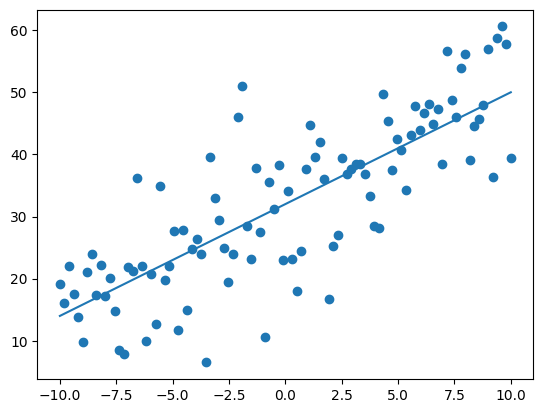

In [ ]:
x, y, y_ideal = gen_xy()

plt.plot(x, y_ideal)
plt.scatter(x, y)

### tensor로 변환 (+shape)

In [ ]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x = x.reshape(-1,1)
y = y.reshape(-1,1)

print(x.shape, type(x))
print(y.shape, type(y))

torch.Size([100, 1]) <class 'torch.Tensor'>
torch.Size([100, 1]) <class 'torch.Tensor'>


# Model

## `torch.nn.Module`
PyTorch로 신경망을 설계하기 위한 조건
1. `torch.nn.Module`을 상속해야 함.
2. `__init()__` override<br>
  모델에서 사용될 module, activation function 등 정의.
3. `forward()` override<br>
  모델에서 실행되어야 하는 계산 정의.

In [ ]:
class DsLinearModel(Module):
  def __init__(self,
               n_in_f, # input vector의 차원 수
               n_out_f # output vector의 차원 수
               ):
    super().__init__()

    init_w = torch.ones(1,1)
    init_b = torch.zeros(1)
    self.l0 = Linear(n_in_f, n_out_f)
    self.l0.weight = Parameter(init_w)
    self.l0.bias = Parameter(init_b)

  def forward(self, x):
    y = self.l0(x)
    return y

In [ ]:
model = DsLinearModel(1,1)

for idx, c in enumerate(model.named_parameters()):
  print(idx, c)
print()

for idx, c in enumerate(model.parameters()):
  print(idx, c)

0 ('l0.weight', Parameter containing:
tensor([[1.]], requires_grad=True))
1 ('l0.bias', Parameter containing:
tensor([0.], requires_grad=True))

0 Parameter containing:
tensor([[1.]], requires_grad=True)
1 Parameter containing:
tensor([0.], requires_grad=True)


In [ ]:
for idx, cl in enumerate(model.named_children()): # cl: child layer
  print(idx, cl)
print()

for idx, cl in enumerate(model.children()): # cl: child layer
  print(idx, cl)

0 ('l0', Linear(in_features=1, out_features=1, bias=True))

0 Linear(in_features=1, out_features=1, bias=True)


In [ ]:
for idx, modu in enumerate(model.named_modules()):
  print(idx, modu)
print()

for idx, modu in enumerate(model.modules()):
  print(idx, modu)

0 ('', DsLinearModel(
  (l0): Linear(in_features=1, out_features=1, bias=True)
))
1 ('l0', Linear(in_features=1, out_features=1, bias=True))

0 DsLinearModel(
  (l0): Linear(in_features=1, out_features=1, bias=True)
)
1 Linear(in_features=1, out_features=1, bias=True)


In [ ]:
pred = model(x)
pred

tensor([[-10.0000],
        [ -9.7980],
        [ -9.5960],
        [ -9.3939],
        [ -9.1919],
        [ -8.9899],
        [ -8.7879],
        [ -8.5859],
        [ -8.3838],
        [ -8.1818],
        [ -7.9798],
        [ -7.7778],
        [ -7.5758],
        [ -7.3737],
        [ -7.1717],
        [ -6.9697],
        [ -6.7677],
        [ -6.5657],
        [ -6.3636],
        [ -6.1616],
        [ -5.9596],
        [ -5.7576],
        [ -5.5556],
        [ -5.3535],
        [ -5.1515],
        [ -4.9495],
        [ -4.7475],
        [ -4.5455],
        [ -4.3434],
        [ -4.1414],
        [ -3.9394],
        [ -3.7374],
        [ -3.5354],
        [ -3.3333],
        [ -3.1313],
        [ -2.9293],
        [ -2.7273],
        [ -2.5253],
        [ -2.3232],
        [ -2.1212],
        [ -1.9192],
        [ -1.7172],
        [ -1.5152],
        [ -1.3131],
        [ -1.1111],
        [ -0.9091],
        [ -0.7071],
        [ -0.5051],
        [ -0.3030],
        [ -0.1010],


# Loss

In [ ]:
loss_func = MSELoss()

l = loss_func(pred, y)
l

tensor(1113.7168, grad_fn=<MseLossBackward0>)

# Training Loop

In [ ]:
def training_loop(
    x, y,
    model,
    lr,
    n_epochs,
):

  model.train()
  # model.eval()

  optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
  )

  print(n_epochs)


  for epoch in range(n_epochs):
    pred = model(x)
    l = loss_func(pred, y)

    if torch.isinf(l).any(): # 무한대로 발산하면
      print('Error: diverge!')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')

  return model

# Train

In [ ]:
model = DsLinearModel(1,1)
model = training_loop(
    x, y,
    model,
    1e-3,
    7000,
)

7000
Epoch 0: Loss 1113.7168
Epoch 1000: Loss 81.4946
Epoch 2000: Loss 63.0912
Epoch 3000: Loss 62.7555
Epoch 4000: Loss 62.7494
Epoch 5000: Loss 62.7492
Epoch 6000: Loss 62.7492


# Evaluation

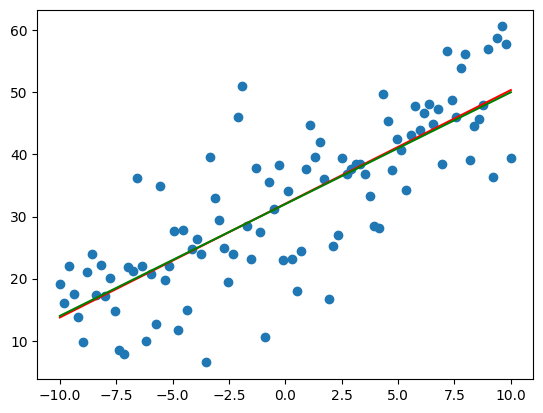

In [ ]:
pred = model(x)
plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(), pred.detach().numpy(), color='r')
plt.plot(x.detach().numpy(), y_ideal, color='g')

In [ ]:
from torchsummary import summary

summary(model, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 1]               2
Total params: 2
Trainable params: 2
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
